In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

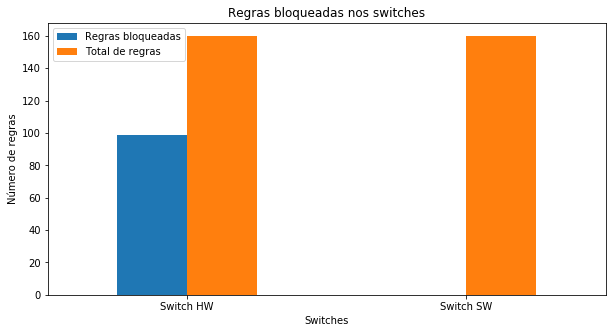

In [2]:
#df = pd.read_csv("iperf.csv", index_col = [1])
df = pd.read_csv("../Saidas/Teste2/teste2.csv")
#Remove colunas desnecessarias
del df['Timestamp']
del df['?']
del df['ForaOrdem']
del df['Tempo']

dfServer = df[df.IpOri != '10.1.0.2']
dfCliente = df[df.IpOri != '10.1.0.1']
#df = dfServer
#df = df.reset_index(drop=True)
del dfCliente['Jitter']
del dfCliente['PctPerdido']
del dfCliente['PctEnv']
del dfCliente['%Perda']

#Pegando informacoes para grafico de bloqueados (APENAS PARA O MODO DE PAR/IMPAR)
bloqueados = []
totalHW = 0
totalSW = 0
for indexC, rowC in dfCliente.iterrows():
    procurar = rowC['PortaOri']
    achou = False
    if (procurar % 2 == 0):
        totalHW += 1
    else:
        totalSW += 1
    for indexS, rowS in dfServer.iterrows():
        if (procurar == rowS['PortaDest']):
            achou = True
            break
    if(achou == False):
        bloqueados.append(procurar)

#print len(bloqueados)
#print bloqueados
#print totalHW
#print totalSW

total = [totalHW, totalSW]
bloq = [len(bloqueados), 0]
index = ['Switch HW', 'Switch SW']
df2 = pd.DataFrame({'Total de regras': total, 'Regras bloqueadas': bloq}, index=index)
ax = df2.plot.bar(rot=0, figsize=(10,5))
ax.set_xlabel("Switches")
ax.set_ylabel(u"Número de regras")
ax.set_title ('Regras bloqueadas nos switches')
fig = plt.gcf()
fig.savefig('taxaBloqueio_parimpar.png')

In [3]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

/home/pedro/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
/home/pedro/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/pedro/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


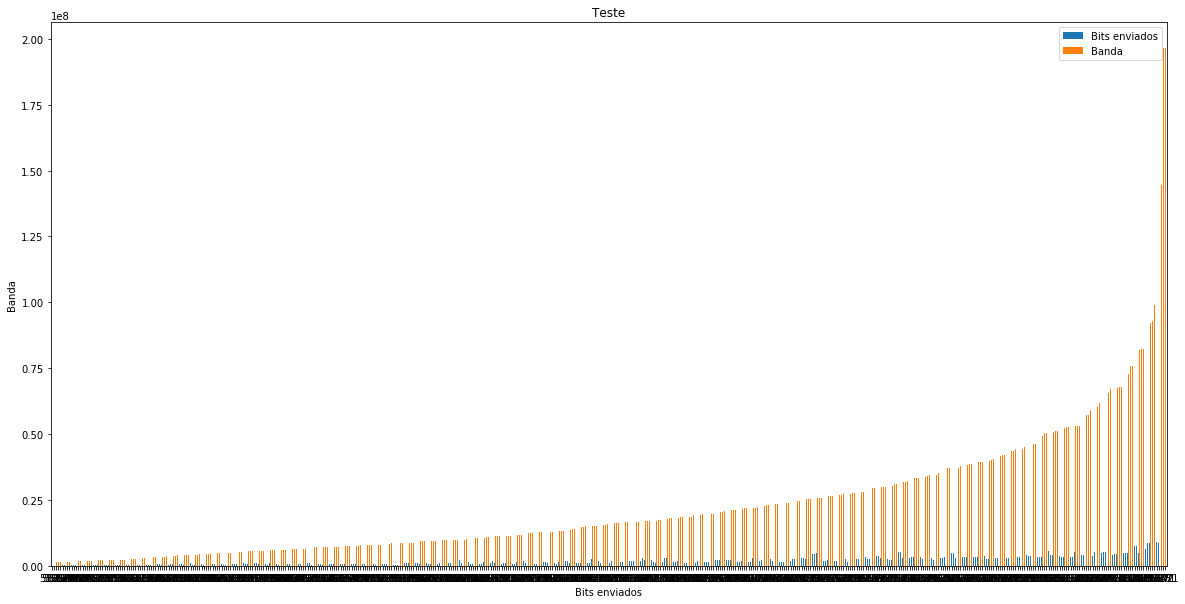

In [4]:
#Removendo trafegos pequenos
df = df.query("BitsEnv > 1000000")

gpb = df.groupby (['PortaOri'])
media = gpb.mean()
err = gpb.aggregate(confinterval)
err = err.filter(items=['Banda', 'BitsEnv'])
media = media.filter(items=['Banda', 'BitsEnv'])
#display (media)
#display (err)

media.sort_values(by=["BitsEnv"]).plot (kind='bar', yerr=err, title="Teste", rot=360, figsize=(20,10))
plt.xlabel('Bits enviados')
plt.ylabel('Banda')
plt.gca().legend(('Bits enviados','Banda'))
#plt.savefig('grafico_teste'.pdf')